# Network Delay Time

You are given a network of n nodes, labeled from 1 to n. You are also given times, a list of travel times as directed edges times[i] = (ui, vi, wi), where ui is the source node, vi is the target node, and wi is the time it takes for a signal to travel from source to target.

We will send a signal from a given node k. Return the minimum time it takes for all the n nodes to receive the signal. If it is impossible for all the n nodes to receive the signal, return -1.

 

**Example 1:**

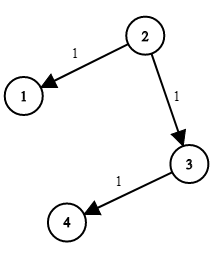

Input: times = [[2,1,1],[2,3,1],[3,4,1]], n = 4, k = 2

Output: 2

**xample 2:**

Input: times = [[1,2,1]], n = 2, k = 1

Output: 1

**Example 3:**

Input: times = [[1,2,1]], n = 2, k = 2
Output: -1
 

**Constraints:**

- 1 <= k <= n <= 100
- 1 <= times.length <= 6000
- times[i].length == 3
- 1 <= ui, vi <= n
- ui != vi
- 0 <= wi <= 100
- All the pairs (ui, vi) are unique. (i.e., no multiple edges.)

In [1]:
import heapq

def network_delay_times(times, n, k):
    # Create a dictionary to store the graph
    graph = {}
    for u, v, w in times:
        if u not in graph:
            graph[u] = []
        graph[u].append((v, w))

    # Initialize distances with infinity
    distances = {node: float('inf') for node in range(1, n+1)}
    distances[k] = 0  # Distance from source node to itself is 0

    # Use a priority queue (min heap) to track nodes with their distances
    pq = [(0, k)]

    while pq:
        distance, node = heapq.heappop(pq)
        if distance > distances[node]:
            continue  # Skip if a shorter distance to this node has been found
        if node in graph:
            for neighbor, edge_weight in graph[node]:
                new_distance = distance + edge_weight
                if new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance
                    heapq.heappush(pq, (new_distance, neighbor))

    # Check if all nodes have been reached
    max_distance = max(distances.values())
    return max_distance if max_distance < float('inf') else -1

# Example usage:
times1 = [[2, 1, 1], [2, 3, 1], [3, 4, 1]]
n1 = 4
k1 = 2
print(network_delay_times(times1, n1, k1))  # Output: 2

times2 = [[1, 2, 1]]
n2 = 2
k2 = 1
print(network_delay_times(times2, n2, k2))  # Output: 1

times3 = [[1, 2, 1]]
n3 = 2
k3 = 2
print(network_delay_times(times3, n3, k3))  # Output: -1

2
1
-1
